<a href="https://colab.research.google.com/github/AiLoveX/M_learning2023/blob/main/%F0%9F%91%AE%E2%80%8D%E2%99%82%EF%B8%8FUS_Police_Shootings_from_2015_Sep_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **0. Описание задачи**

**[🔗US Police Shootings from 2015- Sep 2022🔗](https://www.kaggle.com/datasets/ramjasmaurya/us-police-shootings-from-20152022)**

В наборе данных приведены списки людей, убитых сотрудниками правоохранительных органов в Соединенных Штатах с 2015 года по сентябрь 2022 года, как при исполнении служебных обязанностей, так и вне их.

Задача состоит в "Классификации пола убитого"

Датасет состоит из 7729 записей и 17 признаков.    
**Описание признаков:**   
*   *id* - уникальный идентификатор   
*  *name* - имя жертвы   
*   *date* - дата, когда совершилось убийство   
*   *manner_of_death* - причина смерти   
*   *armed* - вооружена ли была жертва или нет   
*   *age* - возраст жертвы   
*   *gender* - пол жертвы   
*   *race* - раса, этническая принадлежность жервы   
*   *city* - город в котром он/она умер   
*   *state* - штат в котором он/она умер  
*   *signs_of_mental_illness* - были ли у жервы проблемы с ментальныым здоровьем  
*   *threat_level* - уровень угрозы для полицейского   
*   *flee* - жертва убегала (если да, то с помощью чего) или нет   
*   *body_camera* - была ли включена камера полицейского     
*   *longitude* - долгота   
*   *latitude* - широта   
*   *is_geocoding_exact* - доступно ли точное местоположение убийства








# **1. Чтение данных**

In [1003]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [1004]:
data = pd.read_csv('US Police shootings in from 2015-22.csv')

In [1005]:
data

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact
0,1,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,-123.122,47.247,True
1,2,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,-122.892,45.487,True
2,3,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,-97.281,37.695,True
3,4,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,-122.422,37.763,True
4,5,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,-104.692,40.384,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7724,7725,NaN,2022-09-07,shot,screwdriver,NaN,M,NaN,Flagstaff,AZ,False,other,Foot,False,-111.584,35.224,True
7725,7726,NaN,2022-09-07,shot,gun,NaN,M,W,Springville,AL,False,attack,Car,False,-86.472,33.775,True
7726,7727,NaN,2022-09-07,shot,knife,61.0,M,B,St. Louis,MO,False,other,Not fleeing,False,-90.290,38.668,True
7727,7728,Tyler Michael Gardner,2022-09-07,shot,gun,27.0,M,NaN,Washington County,TN,False,attack,Other,False,-82.539,36.309,True


In [1006]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7729 entries, 0 to 7728
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       7729 non-null   int64  
 1   name                     7312 non-null   object 
 2   date                     7729 non-null   object 
 3   manner_of_death          7729 non-null   object 
 4   armed                    7520 non-null   object 
 5   age                      7247 non-null   float64
 6   gender                   7709 non-null   object 
 7   race                     6269 non-null   object 
 8   city                     7729 non-null   object 
 9   state                    7729 non-null   object 
 10  signs_of_mental_illness  7729 non-null   bool   
 11  threat_level             7729 non-null   object 
 12  flee                     6854 non-null   object 
 13  body_camera              7729 non-null   bool   
 14  longitude               

# **2. Визуализация данных**

In [1007]:
# data['date'] = pd.to_datetime(data.date, format='%Y-%m-%d')
# data['year']  = data['date'] .dt.strftime('%Y')
# data['month']  = data['date'] .dt.strftime('%m')
# data['day']  = data['date'] .dt.strftime('%d')

In [1008]:
import plotly.express as px
data['date'] = pd.to_datetime(data.date, format='%Y-%m-%d')
data['year']  = data['date'] .dt.strftime('%Y')

fig = px.line(data.groupby(by= 'year').count().date,title= "Число убийств в год",labels={'year':'Год', 'value':'Количество'}, markers = True)
fig.show()

data = data.drop(['year'],axis=1)

Скриншот из Colab

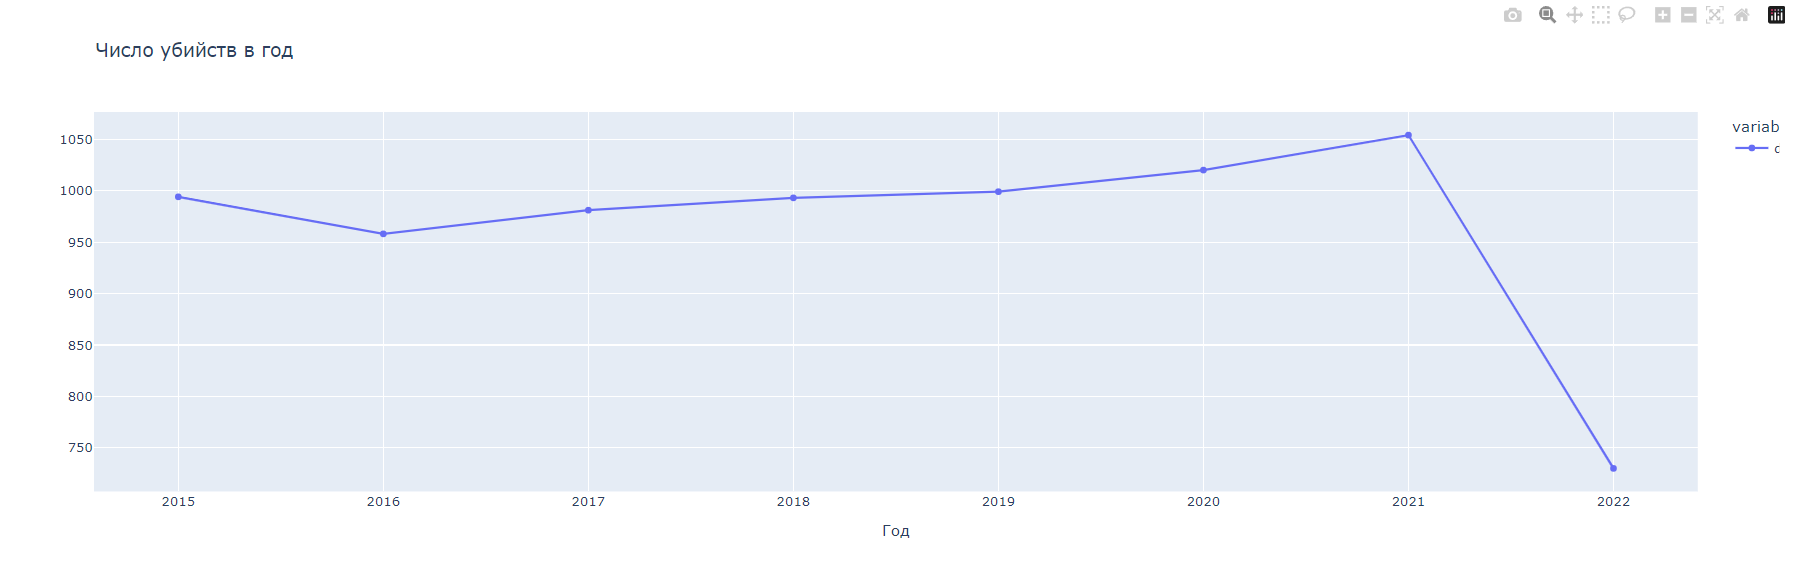

In [1009]:
data['date'] = pd.to_datetime(data.date, format='%Y-%m-%d')
data['month']  = data['date'] .dt.strftime('%m')
fig = px.line(data.groupby(by= 'month').count().date,title= "Число убийств в месяц",  labels={'month':'Месяц', 'value':'Количество'}, markers = True)
fig.show()
data = data.drop(['month'],axis=1)


Скриншот из Colab

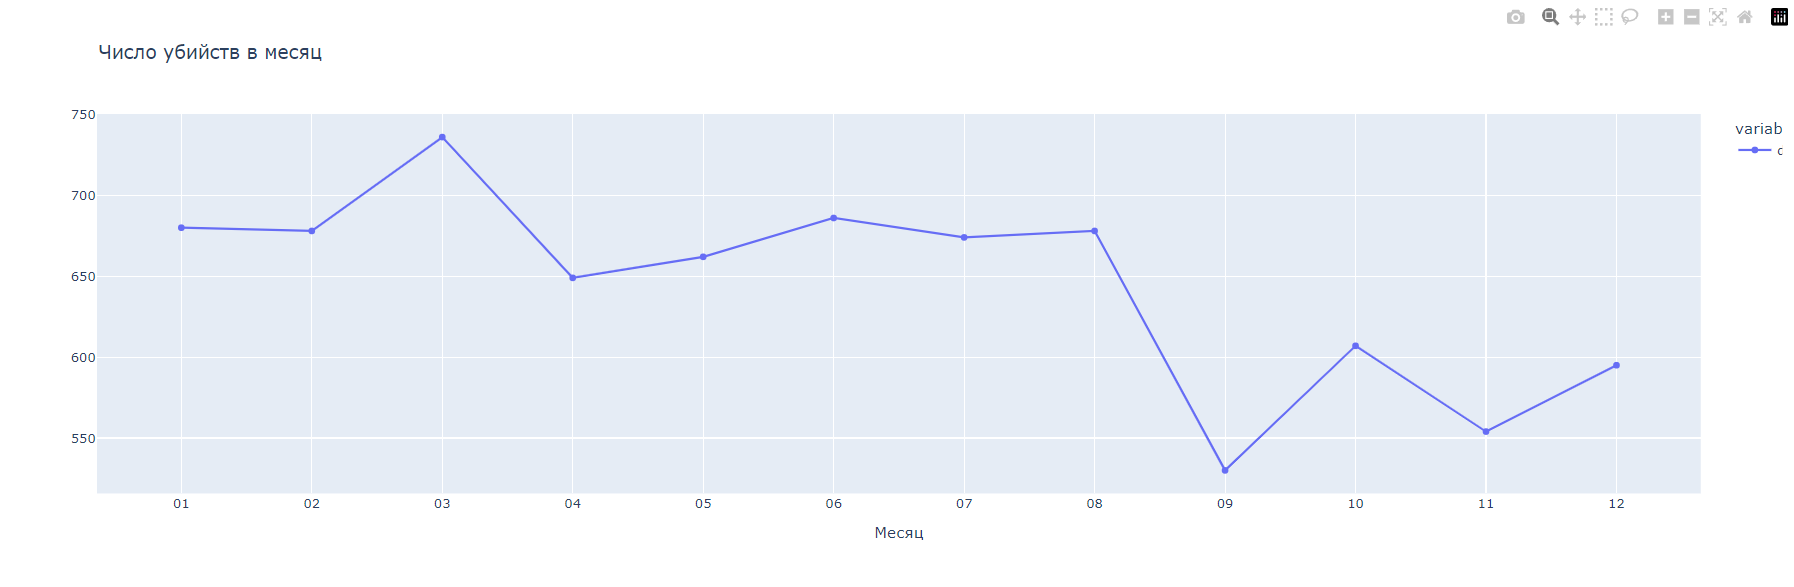

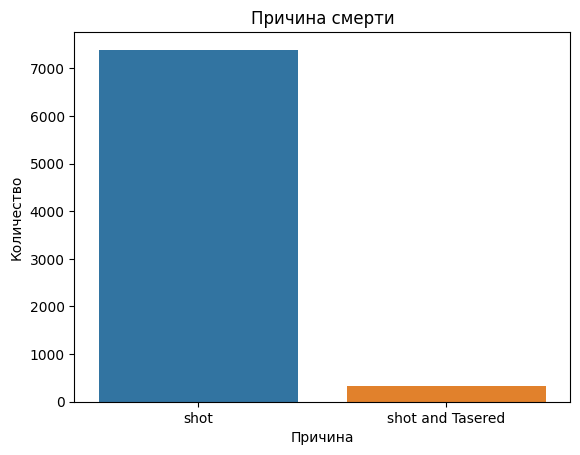

shot                7390
shot and Tasered     339
Name: manner_of_death, dtype: int64

In [1010]:
sns.countplot(data=data, x= "manner_of_death")
plt.title("Причина смерти")
plt.xlabel('Причина')
plt.ylabel('Количество')
plt.show()
data.manner_of_death.value_counts()

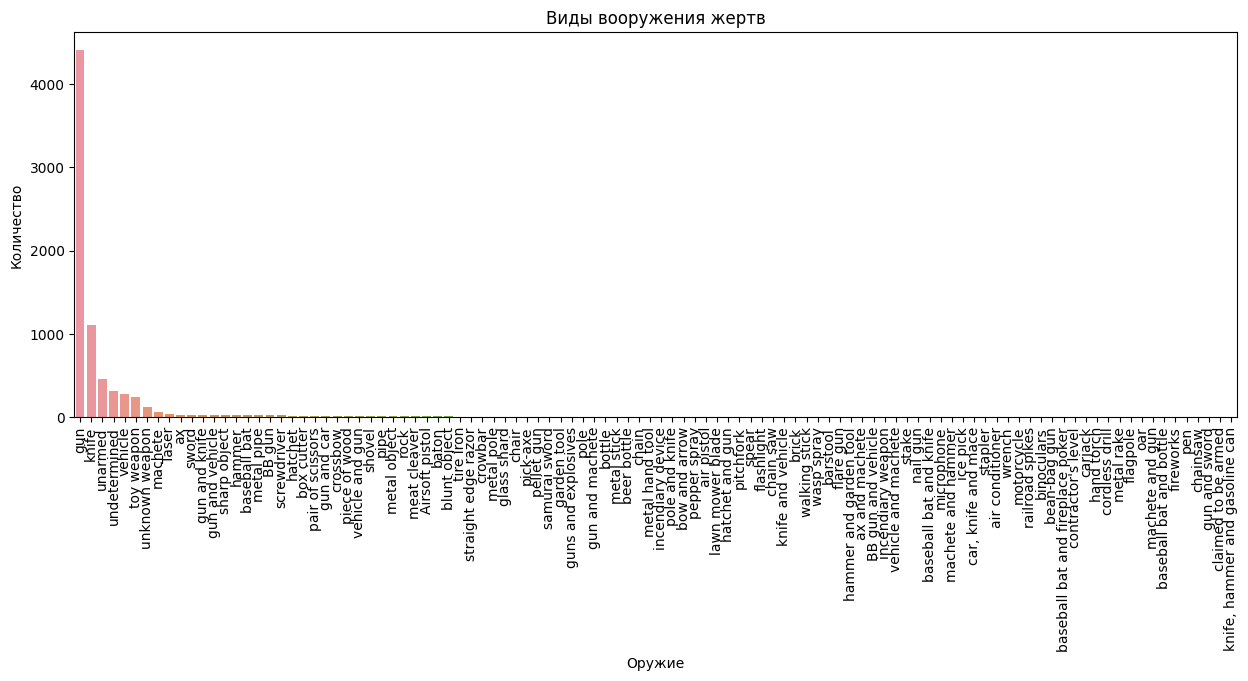

In [1011]:
plt.figure(figsize=(15,5))
sns.countplot(data=data,x='armed',order=data['armed'].value_counts().index)
plt.title("Виды вооружения жертв")
plt.xlabel('Оружие')
plt.ylabel('Количество')
plt.xticks(rotation=90)
plt.show()

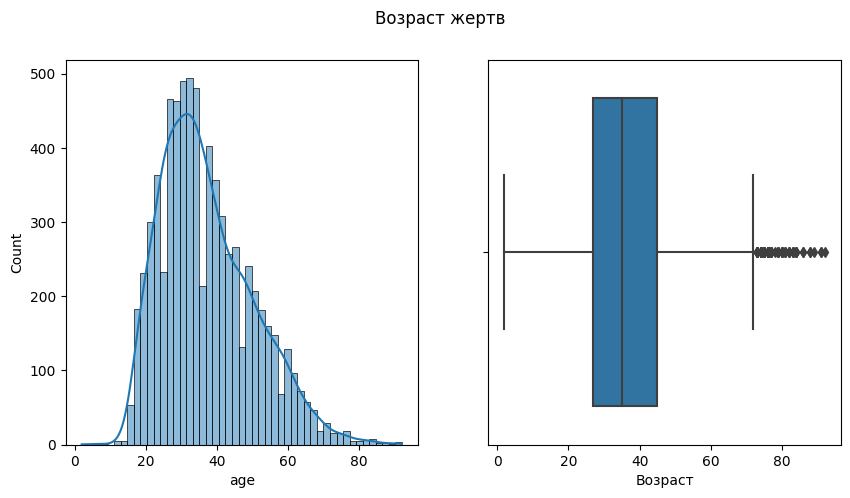

In [1012]:
fig,ax = plt.subplots(1,2,figsize=(10,5))
sns.histplot(data=data,x='age',kde=True,ax=ax[0])

sns.boxplot(x=data['age'],ax=ax[1])
plt.suptitle("Возраст жертв")
plt.xlabel('Возраст')
plt.show()

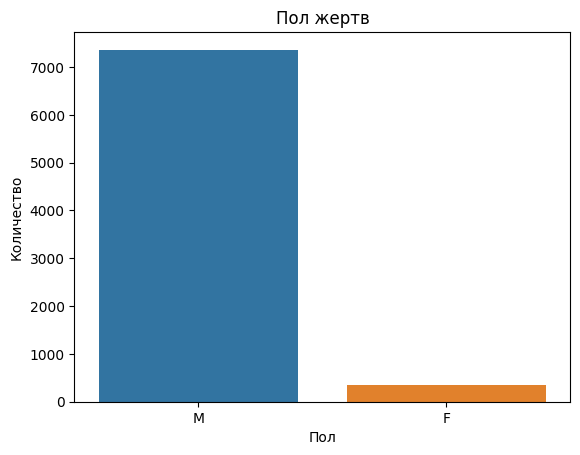

M    7361
F     348
Name: gender, dtype: int64

In [1013]:
sns.countplot(data= data,x= "gender")
plt.title("Пол жертв")
plt.xlabel('Пол')
plt.ylabel('Количество')
plt.show()
data.gender.value_counts()

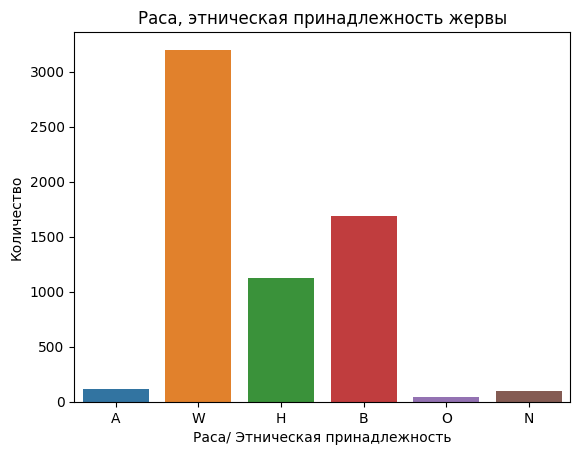

W    3198
B    1686
H    1128
A     113
N      97
O      47
Name: race, dtype: int64

In [1014]:
sns.countplot(data=data,x='race')
plt.title("Раса, этническая принадлежность жервы")
plt.xlabel('Раса/ Этническая принадлежность')
plt.ylabel('Количество')
plt.show()
data.race.value_counts()

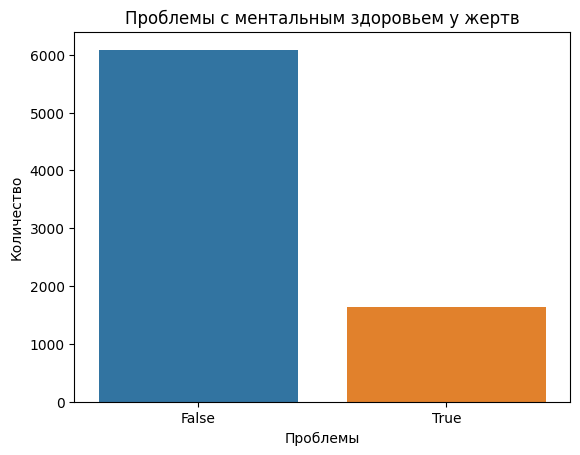

False    6089
True     1640
Name: signs_of_mental_illness, dtype: int64

In [1015]:
sns.countplot(data=data, x='signs_of_mental_illness')
plt.title("Проблемы с ментальным здоровьем у жертв")
plt.xlabel('Проблемы')
plt.ylabel('Количество')
plt.show()

data.signs_of_mental_illness.value_counts()

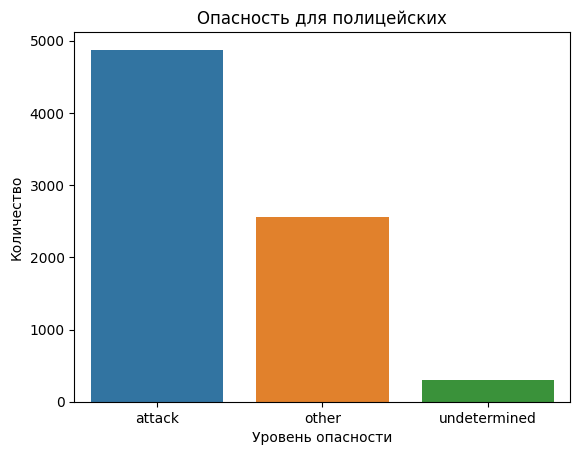

attack          4875
other           2552
undetermined     302
Name: threat_level, dtype: int64

In [1016]:
sns.countplot(data=data,x='threat_level')
plt.title("Опасность для полицейских")
plt.xlabel('Уровень опасности')
plt.ylabel('Количество')
plt.show()
data.threat_level.value_counts()

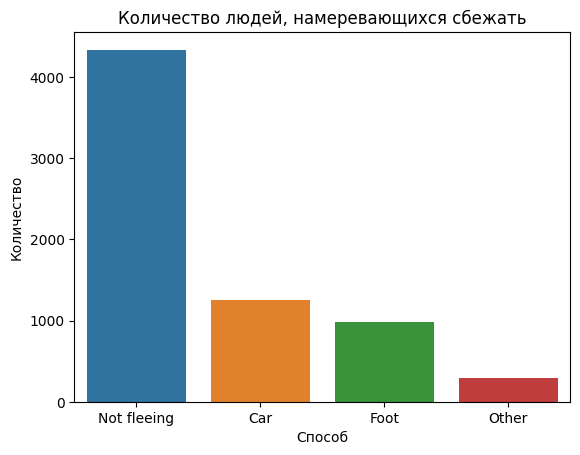

Not fleeing    4336
Car            1249
Foot            982
Other           287
Name: flee, dtype: int64

In [1017]:
sns.countplot(data=data,x='flee')
plt.title("Количество людей, намеревающихся сбежать")
plt.xlabel('Способ')
plt.ylabel('Количество')
plt.show()
data.flee.value_counts()

False  6623 True  1106


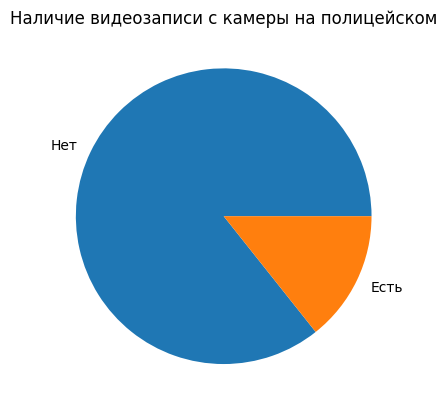

In [1018]:
camera_true = data.query('body_camera == True')
camera_false =data.query('body_camera == False')
print('False ',len(camera_false),'True ',len(camera_true))
x = ['Нет','Есть']
y = [len(camera_false),len(camera_true)]
plt.pie(y, labels = x)
plt.title(label = 'Наличие видеозаписи с камеры на полицейском')
plt.show()

In [1019]:
px.histogram(data,
             x = 'flee',
             color = 'threat_level',
             barmode = 'group',
             labels={'count':'Количество', 'flee':'Способ'},
             text_auto = True,
             title = 'Зависимость опасности для полицеского от намерения жервы сбежать'
             )

Скриншот из Colab

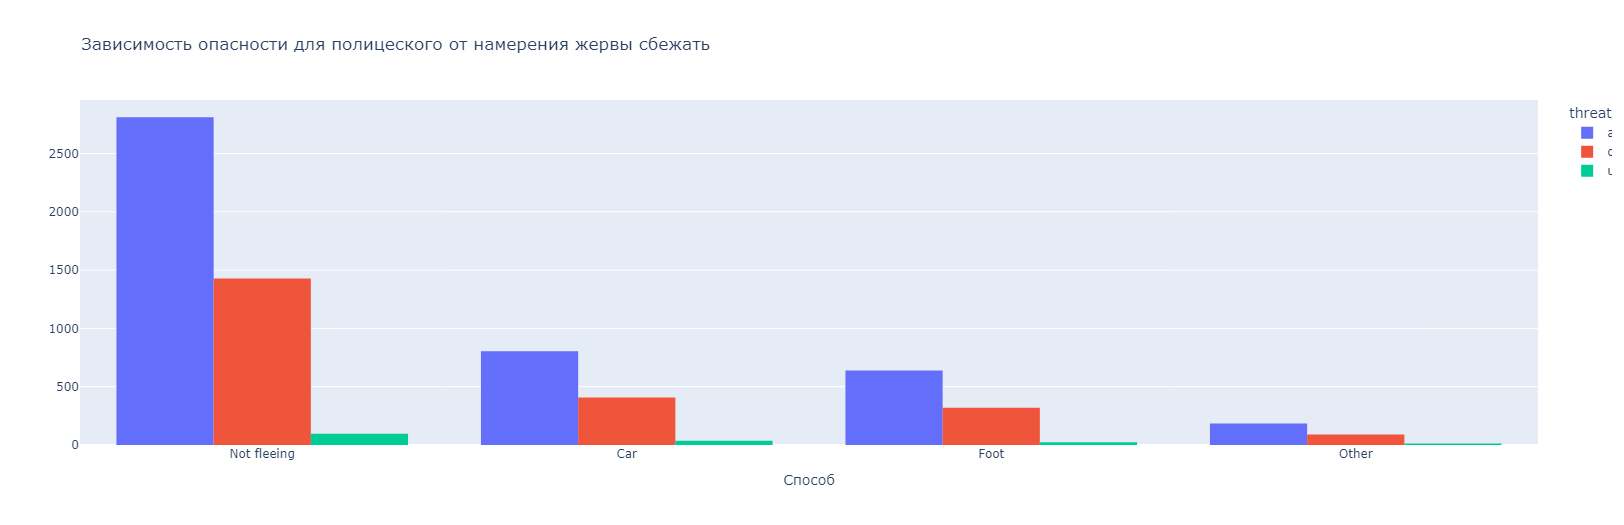

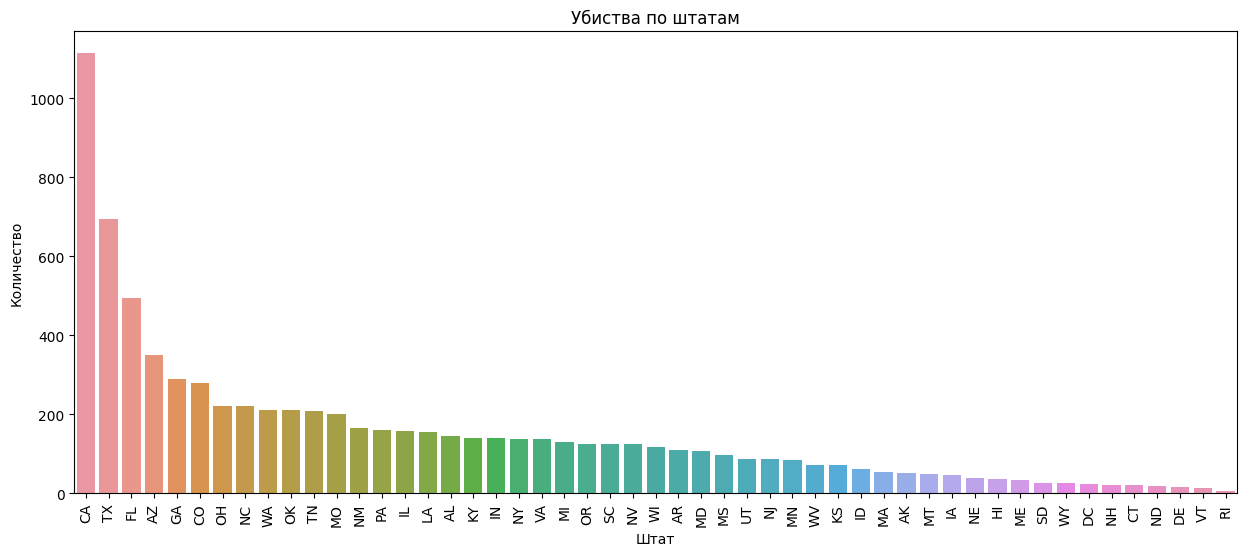

In [1020]:
statewise = pd.DataFrame(data.groupby(by=['state']).date.count())
statewise = statewise.reset_index()
statewise.columns=['state','count']
statewise = statewise.sort_values(by=['count'],ascending=False)
plt.figure(figsize=(15,6))
sns.barplot(data=statewise,x='state',y='count')
plt.xticks(rotation=90)
plt.xlabel('Штат')
plt.ylabel('Количество')
plt.title("Убиства по штатам")
plt.show()

In [1021]:
import plotly.graph_objects as go

fig = go.Figure()

data['text'] =  data['city'] + ', ' + data['state']

fig.add_trace(go.Scattergeo(
        lon = data['longitude'],
        lat = data['latitude'],
        text = data['text'],
        mode = 'markers',
        marker = go.scattergeo.Marker(
            size=5,
            color='rgb(147, 112, 219)',
            opacity=0.7
        ),
        ))
fig.update_layout(
        autosize=True,
        title = 'Местоположения убийств'
    )
fig.show()
data = data.drop(['text'],axis=1)

Скриншот из Colab

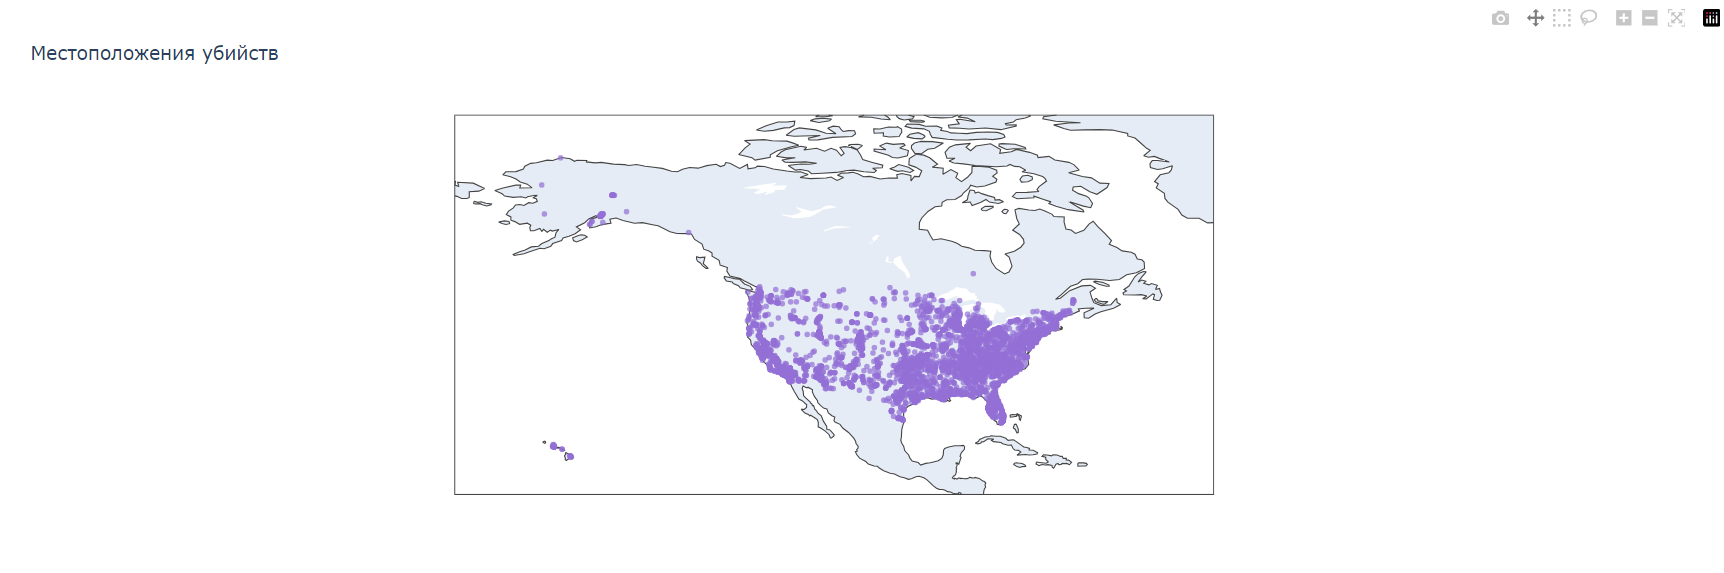

In [1022]:
data['age'].describe()

count    7247.000000
mean       37.178971
std        12.966191
min         2.000000
25%        27.000000
50%        35.000000
75%        45.000000
max        92.000000
Name: age, dtype: float64

Средний возраст жертв 37 лет. Минимальный 2 года, максимальный 92 года

# **3. Обработатка пропущенных значений**

In [1023]:
data.isna().sum()

id                            0
name                        417
date                          0
manner_of_death               0
armed                       209
age                         482
gender                       20
race                       1460
city                          0
state                         0
signs_of_mental_illness       0
threat_level                  0
flee                        875
body_camera                   0
longitude                   837
latitude                    837
is_geocoding_exact            0
dtype: int64

Заполняем возраст по медиане

In [1024]:
from sklearn.impute import SimpleImputer
imr=SimpleImputer(missing_values=np.nan, strategy='median')
imr=imr.fit(data[['age']])
data['age']=imr.transform(data[['age']])

Заполняет расу по моде

In [1025]:
data['race'].fillna(data['race'].mode().iloc[0], inplace=True)

In [1026]:
data.groupby('race')['race'].count()

race
A     113
B    1686
H    1128
N      97
O      47
W    4658
Name: race, dtype: int64

In [1027]:
# imp_most_freq = SimpleImputer(strategy = 'most_frequent')
# data['race'] = imp_most_freq.fit_transform(data[['race']])
# data.race.isna().sum()

Заполняем намерение сбежать по моде

In [1028]:
data['flee'].fillna(data['flee'].mode().iloc[0], inplace=True)

In [1029]:
data.groupby('flee')['flee'].count()

flee
Car            1249
Foot            982
Not fleeing    5211
Other           287
Name: flee, dtype: int64

In [1030]:
# imp_most_freq = SimpleImputer(strategy = 'most_frequent')
# data['flee'] = imp_most_freq.fit_transform(data[['flee']])
# data.race.isna().sum()

Заполняем вооружение по моде

In [1031]:
data['armed'].fillna(data['armed'].mode().iloc[0], inplace=True)

Удаляем столбцы с именем и и id

In [1032]:
data.drop(columns = ['name','id','date'], inplace = True)

Удвляем оствшиеся строки с пустыми значениями




In [1033]:
data = data.dropna()

Проверяем на пустые значения

In [1034]:
data.isna().sum()

manner_of_death            0
armed                      0
age                        0
gender                     0
race                       0
city                       0
state                      0
signs_of_mental_illness    0
threat_level               0
flee                       0
body_camera                0
longitude                  0
latitude                   0
is_geocoding_exact         0
dtype: int64

Проверяем количество значений

In [1035]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6876 entries, 0 to 7727
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   manner_of_death          6876 non-null   object 
 1   armed                    6876 non-null   object 
 2   age                      6876 non-null   float64
 3   gender                   6876 non-null   object 
 4   race                     6876 non-null   object 
 5   city                     6876 non-null   object 
 6   state                    6876 non-null   object 
 7   signs_of_mental_illness  6876 non-null   bool   
 8   threat_level             6876 non-null   object 
 9   flee                     6876 non-null   object 
 10  body_camera              6876 non-null   bool   
 11  longitude                6876 non-null   float64
 12  latitude                 6876 non-null   float64
 13  is_geocoding_exact       6876 non-null   bool   
dtypes: bool(3), float64(3), 

# **4. Обработатка категориальных признаков**

In [1036]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6876 entries, 0 to 7727
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   manner_of_death          6876 non-null   object 
 1   armed                    6876 non-null   object 
 2   age                      6876 non-null   float64
 3   gender                   6876 non-null   object 
 4   race                     6876 non-null   object 
 5   city                     6876 non-null   object 
 6   state                    6876 non-null   object 
 7   signs_of_mental_illness  6876 non-null   bool   
 8   threat_level             6876 non-null   object 
 9   flee                     6876 non-null   object 
 10  body_camera              6876 non-null   bool   
 11  longitude                6876 non-null   float64
 12  latitude                 6876 non-null   float64
 13  is_geocoding_exact       6876 non-null   bool   
dtypes: bool(3), float64(3), 

Обрабатываем столбец с полом

In [1037]:
data.gender.value_counts()

M    6557
F     319
Name: gender, dtype: int64

In [1038]:
obrash = {"M": 1, "F": 0}
data["Sex"] = data["gender"].apply(lambda m: obrash.get(m))

Обрабатываем столбец с расой

In [1039]:
data.race.value_counts()

W    4012
B    1553
H    1070
A     105
N      89
O      47
Name: race, dtype: int64

In [1040]:
obrash = {"O": 5, "N": 4,"A": 3,"H": 2,"W": 1, "B": 0}
data["raceN"] = data["race"].apply(lambda m: obrash.get(m))

Обрабатываем столбец с способом убийства

In [1041]:
data.manner_of_death.value_counts()

shot                6550
shot and Tasered     326
Name: manner_of_death, dtype: int64

In [1042]:
obrash = {"shot and Tasered": 1, "shot": 0}
data["manner_of_deathN"] = data["manner_of_death"].apply(lambda m: obrash.get(m))

Обрабатываем столбец с ментальным здоровьем

In [1043]:
data.signs_of_mental_illness.value_counts()

False    5362
True     1514
Name: signs_of_mental_illness, dtype: int64

In [1044]:
data["signs_of_mental_illness"] = data["signs_of_mental_illness"].astype(int)

Обрабатываем столбец с опасностью для полицейских

In [1045]:
data.threat_level.value_counts()

attack          4357
other           2273
undetermined     246
Name: threat_level, dtype: int64

In [1046]:
obrash = {"undetermined": 2, "other": 1, "attack": 0}
data["threat_levelN"] = data["threat_level"].apply(lambda m: obrash.get(m))

Обработка столбца с сбегала ли жертва

In [1047]:
data.flee.value_counts()

Not fleeing    4666
Car            1082
Foot            875
Other           253
Name: flee, dtype: int64

In [1048]:
obrash = {"Other":3,"Foot": 2, "Car": 1, "Not fleeing": 0}
data["fleeN"] = data["flee"].apply(lambda m: obrash.get(m))

Обработка столбца с камерой

In [1049]:
data.body_camera.value_counts()

False    5893
True      983
Name: body_camera, dtype: int64

In [1050]:
data["body_camera"] = data["body_camera"].astype(int)

Обработка в категории Вооружения, Города и Штата

In [1051]:
data["armed"] = data["armed"].astype('category')
data["city"] = data["city"].astype('category')
data["state"] = data["state"].astype('category')

Удаляем оригинальные столбцы и столбец про геолокацию

In [1052]:
data = data.drop(['manner_of_death','gender','race','threat_level','flee','is_geocoding_exact'],axis=1)

In [1053]:
 from sklearn.preprocessing import LabelEncoder
 le = LabelEncoder()
 data.armed = le.fit_transform(data.armed)
 data.city = le.fit_transform(data.city)
 data.state = le.fit_transform(data.state )

In [1054]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6876 entries, 0 to 7727
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   armed                    6876 non-null   int64  
 1   age                      6876 non-null   float64
 2   city                     6876 non-null   int64  
 3   state                    6876 non-null   int64  
 4   signs_of_mental_illness  6876 non-null   int64  
 5   body_camera              6876 non-null   int64  
 6   longitude                6876 non-null   float64
 7   latitude                 6876 non-null   float64
 8   Sex                      6876 non-null   int64  
 9   raceN                    6876 non-null   int64  
 10  manner_of_deathN         6876 non-null   int64  
 11  threat_levelN            6876 non-null   int64  
 12  fleeN                    6876 non-null   int64  
dtypes: float64(3), int64(10)
memory usage: 752.1 KB


# **5. Вычисление основных характеристик**

Построим корреляционную матрицу

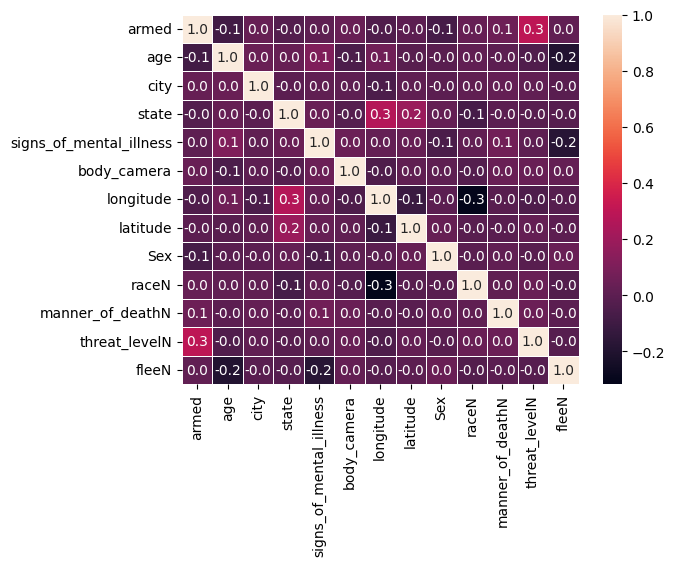

In [1055]:
import seaborn as sns
snsplot = sns.heatmap(data.corr(), annot=True,linewidths=0.5, fmt='.1f')

Постоим все диаграммы рассеивания

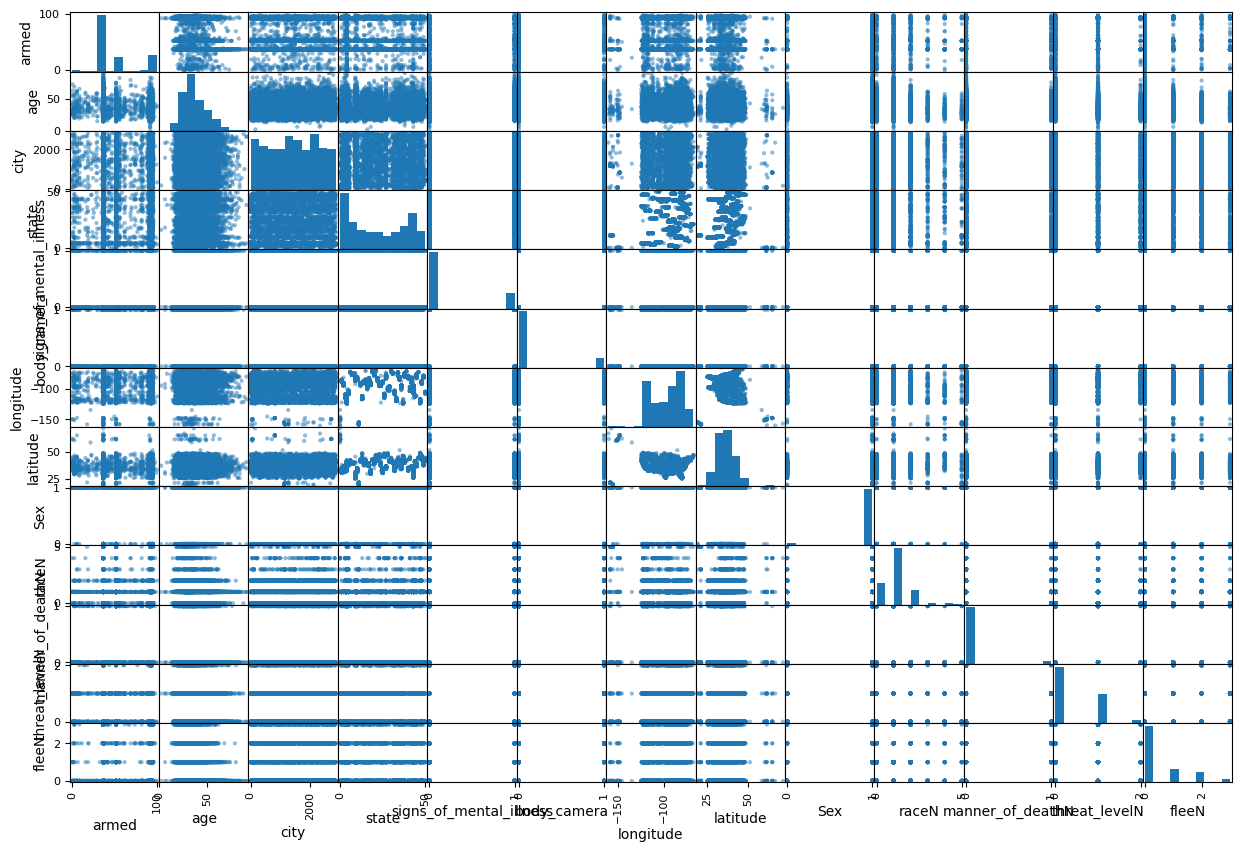

In [1056]:
pd.plotting.scatter_matrix(data, figsize = (15, 10))
pass

# **6. Разбиение данных на обучающую и тестовую выборки, нормализация данных**

In [1057]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [1058]:
x=data.drop("Sex",axis=1)
y=data.Sex
data = data.drop('Sex',axis=1)
data.head(20)

,armed,age,city,state,signs_of_mental_illness,body_camera,longitude,latitude,raceN,manner_of_deathN,threat_levelN,fleeN
0,37,53.0,2368,47,1,0,-123.122,47.247,3,0,0,0
1,37,47.0,40,37,0,0,-122.892,45.487,1,0,0,0
2,92,23.0,2812,16,0,0,-97.281,37.695,2,1,1,0
3,91,32.0,2288,4,1,0,-122.422,37.763,1,0,0,0
4,67,39.0,814,5,0,0,-104.692,40.384,2,0,0,0
5,37,18.0,1047,36,0,0,-97.423,35.877,1,0,0,0
6,37,22.0,435,3,0,0,-111.841,33.328,2,0,0,1
7,37,35.0,104,16,0,0,-97.564,38.704,1,0,0,0
8,92,34.0,331,12,0,1,-91.119,40.809,1,0,1,0
9,91,47.0,1330,38,0,0,-79.991,40.413,0,0,0,0


Нормализация данных

In [1059]:
normalized = x - x.mean(axis=0)
normalized = normalized / x.std(axis=0)
normalized.head(5)

,armed,age,city,state,signs_of_mental_illness,body_camera,longitude,latitude,raceN,manner_of_deathN,threat_levelN,fleeN
0,-0.576717,1.261788,1.145068,1.560728,1.881780,-0.408392,-1.569533,1.955341,2.415005,-0.223078,-0.719895,-0.613401
1,-0.576717,0.787427,-1.680141,0.931115,-0.531334,-0.408392,-1.555679,1.629642,-0.032390,-0.223078,-0.719895,-0.613401
2,1.899952,-1.110014,1.683896,-0.391073,-0.531334,-0.408392,-0.013055,0.187686,1.191308,4.482087,1.070339,-0.613401
3,1.854921,-0.398474,1.047982,-1.146608,1.881780,-0.408392,-1.527370,0.200270,-0.032390,-0.223078,-0.719895,-0.613401
4,0.774193,0.154947,-0.740832,-1.083647,-0.531334,-0.408392,-0.459441,0.685302,1.191308,-0.223078,-0.719895,-0.613401


In [1060]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6876 entries, 0 to 7727
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   armed                    6876 non-null   int64  
 1   age                      6876 non-null   float64
 2   city                     6876 non-null   int64  
 3   state                    6876 non-null   int64  
 4   signs_of_mental_illness  6876 non-null   int64  
 5   body_camera              6876 non-null   int64  
 6   longitude                6876 non-null   float64
 7   latitude                 6876 non-null   float64
 8   raceN                    6876 non-null   int64  
 9   manner_of_deathN         6876 non-null   int64  
 10  threat_levelN            6876 non-null   int64  
 11  fleeN                    6876 non-null   int64  
dtypes: float64(3), int64(9)
memory usage: 698.3 KB


In [1061]:
X_train, X_test, y_train, y_test = train_test_split(normalized, y,
                                                    test_size=0.25,
                                                    random_state=43)

In [1062]:
X_train

,armed,age,city,state,signs_of_mental_illness,body_camera,longitude,latitude,raceN,manner_of_deathN,threat_levelN,fleeN
580,-0.576717,0.154947,0.198477,-0.705879,-0.531334,-0.408392,-3.578961,-2.921440,-1.256087,-0.223078,-0.719895,-0.613401
3471,-0.576717,-0.082234,1.009147,-1.272531,-0.531334,-0.408392,0.236489,-0.257559,-0.032390,-0.223078,-0.719895,-0.613401
137,0.098738,-0.556594,-0.493262,1.623689,1.881780,-0.408392,0.542472,1.451989,-0.032390,4.482087,-0.719895,-0.613401
907,-0.576717,-1.505315,0.514007,-1.146608,-0.531334,-0.408392,-1.265959,-0.511456,1.191308,-0.223078,-0.719895,-0.613401
2093,1.899952,-1.426255,-0.922869,-0.013305,-0.531334,-0.408392,0.839360,1.054118,-1.256087,-0.223078,-0.719895,2.910196
...,...,...,...,...,...,...,...,...,...,...,...,...
6612,-0.576717,-0.240354,-0.365836,-1.146608,-0.531334,-0.408392,-1.214400,-0.473704,-0.032390,-0.223078,-0.719895,-0.613401
2371,-0.576717,-0.240354,-0.058801,-0.831802,-0.531334,-0.408392,0.939588,-1.630119,-0.032390,-0.223078,-0.719895,2.910196
2349,-0.576717,-0.556594,0.573473,1.245922,-0.531334,-0.408392,0.756178,-0.031050,-0.032390,-0.223078,1.070339,0.561131
3490,1.899952,-0.872834,-0.921655,0.364463,-0.531334,2.448273,-0.108464,2.115600,-0.032390,-0.223078,-0.719895,1.735664


In [1063]:
X_test

,armed,age,city,state,signs_of_mental_illness,body_camera,longitude,latitude,raceN,manner_of_deathN,threat_levelN,fleeN
5084,-0.576717,-0.082234,-0.056374,0.049657,1.881780,-0.408392,0.228900,1.476601,-0.032390,-0.223078,-0.719895,-0.613401
1165,0.098738,0.313067,-0.200790,0.994076,-0.531334,-0.408392,1.092760,0.674753,-0.032390,4.482087,1.070339,-0.613401
2719,-0.576717,1.419908,0.952109,1.560728,1.881780,-0.408392,-1.571882,1.877617,-0.032390,-0.223078,-0.719895,-0.613401
2950,-0.576717,1.578028,1.041914,-0.831802,-0.531334,-0.408392,0.917964,-1.889012,1.191308,-0.223078,-0.719895,-0.613401
5972,0.098738,-0.003173,-1.482328,-1.272531,-0.531334,-0.408392,0.171498,-0.055848,-0.032390,-0.223078,-0.719895,-0.613401
...,...,...,...,...,...,...,...,...,...,...,...,...
6717,-0.576717,-0.556594,-0.038171,0.679270,-0.531334,-0.408392,-1.088513,-0.095820,-0.032390,-0.223078,-0.719895,-0.613401
7445,1.854921,-0.161294,1.058904,-1.146608,-0.531334,2.448273,-1.493158,-0.012915,-0.032390,-0.223078,2.860572,0.561131
5470,-0.576717,-0.477534,0.645074,-0.831802,-0.531334,-0.408392,0.678237,-1.203565,-1.256087,-0.223078,-0.719895,-0.613401
4194,0.098738,0.392127,-0.444719,1.245922,-0.531334,-0.408392,0.720521,-0.306599,-0.032390,-0.223078,-0.719895,-0.613401


In [1064]:
y_train

580     1
3471    1
137     1
907     1
2093    1
       ..
6612    1
2371    1
2349    1
3490    1
6305    1
Name: Sex, Length: 5157, dtype: int64

In [1065]:
y_test

5084    1
1165    1
2719    1
2950    1
5972    1
       ..
6717    1
7445    1
5470    1
4194    1
4150    1
Name: Sex, Length: 1719, dtype: int64

# **7. Запуск классификатора ближайших соседей**

In [1066]:
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest, f_classif

In [1067]:
ngbh = KNeighborsClassifier(n_neighbors=3)


In [1068]:
ngbh.fit(x_train.values, y_train.values)
y_train_pred = ngbh.predict(x_train.values)
y_test_pred = ngbh.predict(x_test.values)
print("Ошибка на обучении: {}, Ошибка на тесте: {}".format(sklearn.metrics.mean_squared_error(y_train, y_train_pred), sklearn.metrics.mean_squared_error(y_test, y_test_pred)))

Ошибка на обучении: 0.04576304052743843, Ошибка на тесте: 0.054682955206515414


# **8. Подобрка оптимального значения к-ва ближайших соседей**

*Проверим 5 соседей*

In [1069]:
ngbh = KNeighborsClassifier(n_neighbors=5)

In [1070]:
ngbh.fit(x_train.values, y_train.values)
y_train_pred = ngbh.predict(x_train.values)
y_test_pred = ngbh.predict(x_test.values)
print("Ошибка на обучении: {}, Ошибка на тесте: {}".format(sklearn.metrics.mean_squared_error(y_train, y_train_pred), sklearn.metrics.mean_squared_error(y_test, y_test_pred)))

Ошибка на обучении: 0.04595695171611402, Ошибка на тесте: 0.048283885980221056


Ошибка уменьшилась

*Проверим 7 соседей*

In [1071]:
ngbh = KNeighborsClassifier(n_neighbors=7)
ngbh.fit(x_train.values, y_train.values)
y_train_pred = ngbh.predict(x_train.values)
y_test_pred = ngbh.predict(x_test.values)
print("Ошибка на обучении: {}, Ошибка на тесте: {}".format(sklearn.metrics.mean_squared_error(y_train, y_train_pred), sklearn.metrics.mean_squared_error(y_test, y_test_pred)))

Ошибка на обучении: 0.04653868528214078, Ошибка на тесте: 0.04653868528214078


Ошибка уменьшилась

*Проверим 2 сеседей*

In [1072]:
ngbh = KNeighborsClassifier(n_neighbors=2)
ngbh.fit(x_train.values, y_train.values)
y_train_pred = ngbh.predict(x_train.values)
y_test_pred = ngbh.predict(x_test.values)
print("Ошибка на обучении: {}, Ошибка на тесте: {}".format(sklearn.metrics.mean_squared_error(y_train, y_train_pred), sklearn.metrics.mean_squared_error(y_test, y_test_pred)))

Ошибка на обучении: 0.048283885980221056, Ошибка на тесте: 0.13496218731820825


Ошибка увеличилась

*Проверим 4 соседа*

In [1073]:
ngbh = KNeighborsClassifier(n_neighbors=4)
ngbh.fit(x_train.values, y_train.values)
y_train_pred = ngbh.predict(x_train.values)
y_test_pred = ngbh.predict(x_test.values)
print("Ошибка на обучении: {}, Ошибка на тесте: {}".format(sklearn.metrics.mean_squared_error(y_train, y_train_pred), sklearn.metrics.mean_squared_error(y_test, y_test_pred)))


Ошибка на обучении: 0.048089974791545476, Ошибка на тесте: 0.062245491564863295


Ошибка уменьшалась, но больше чем при значении 7

Увеличением соседей мы можем уменьшить ошибку. Из проверенных, оптимальное значение соседей будет 7

# **9. Вычислить ошибки на обучающей и тестовой выборках.**

Text(0, 0.5, 'Ошибка')

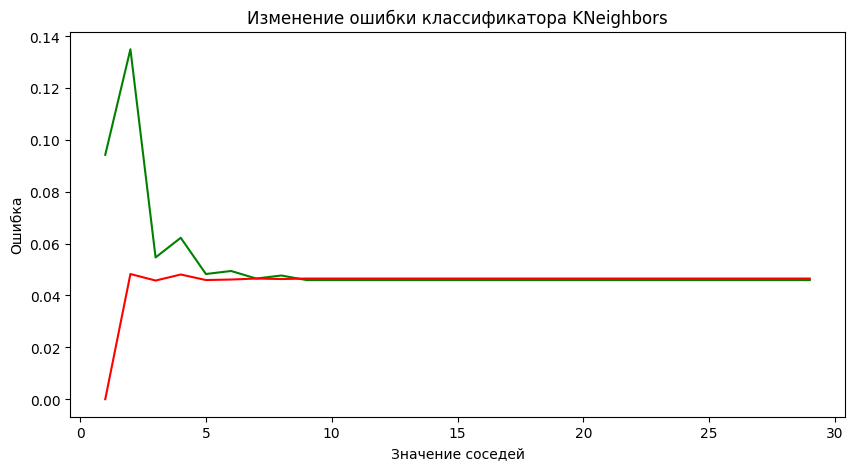

In [1074]:
err = []
for i in range(1, 30):
    ngbh = KNeighborsClassifier(n_neighbors=i)
    ngbh.fit(x_train.values, y_train.values)
    y_test_pred = ngbh.predict(x_test.values)
    err.append(sklearn.metrics.mean_squared_error(y_test, y_test_pred))
err2 = []
for i in range(1, 30):
    ngbh = KNeighborsClassifier(n_neighbors=i)
    ngbh.fit(x_train.values, y_train.values)
    y_train_pred = ngbh.predict(x_train.values)
    err2.append(sklearn.metrics.mean_squared_error(y_train, y_train_pred))

plt.figure(figsize=(10, 5))
plt.plot(range(1, 30), err, color='green')
plt.plot(range(1, 30), err2, color='red')
plt.title('Изменение ошибки классификатора KNeighbors')
plt.xlabel('Значение соседей')
plt.ylabel('Ошибка')

Ошибка незначительно меняется после 9 соседей на тестовой выборке, и после 7 соседей на тренировочной выборке. Значение ошибки после 9 почти одинаковы

# **10. По желанию: Запуск других классификаторов. Сравние результатов**

Метод случайного леса

In [1075]:
frst = RandomForestClassifier(random_state=1, n_estimators=500, min_samples_split=8, min_samples_leaf=2)
frst.fit(x_train.values, y_train.values)
y_train_pred = frst.predict(x_train.values)
y_test_pred = frst.predict(x_test.values)
print("Ошибка на обучении: {}, Ошибка на тесте: {}".format(sklearn.metrics.mean_squared_error(y_train, y_train_pred), sklearn.metrics.mean_squared_error(y_test, y_test_pred)))


Ошибка на обучении: 0.046150862904789605, Ошибка на тесте: 0.04595695171611402


Наивный метод Байеса

In [1076]:
nbs = GaussianNB()
nbs.fit(x_train.values, y_train.values)
y_train_pred = nbs.predict(x_train.values)
y_test_pred = nbs.predict(x_test.values)
print("Ошибка на обучении: {}, Ошибка на тесте: {}".format(sklearn.metrics.mean_squared_error(y_train, y_train_pred), sklearn.metrics.mean_squared_error(y_test, y_test_pred)))

Ошибка на обучении: 0.04653868528214078, Ошибка на тесте: 0.04595695171611402


Стохастический градиентный спуск

In [1077]:
sgd = SGDClassifier(random_state=1)
sgd.fit(x_train.values, y_train.values)
y_train_pred = sgd.predict(x_train.values)
y_test_pred = sgd.predict(x_test.values)
print("Ошибка на обучении: {}, Ошибка на тесте: {}".format(sklearn.metrics.mean_squared_error(y_train, y_train_pred), sklearn.metrics.mean_squared_error(y_test, y_test_pred)))


Ошибка на обучении: 0.04653868528214078, Ошибка на тесте: 0.04595695171611402


Ошибки в классификторах Метод случайного леса, Наивный метод Байеса, Стохастический градиентный спуск близки и чуть меньше чем в классификаторе Метод k-ближайших соседей

# **11. Общие выводы**

Был произведен анализ набора данных о Полицеской стрельбе в США с целью классифицировать пол жертв применения оружия полицейскими. С помощью классификатора "Метод k-ближайших соседей" мы увидели, что стабильный результат начинает появляется при k >= 7. Ошибка при даных значениях не привышает 4.7%. При сравнении Метода k-ближайших соседей с другими классификаторами выяснилось, что они работают лучше, так как ошибка в них не привышала 4.6%